Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')
   Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0           1         13.540           14.36             87.46        566.3   
1           2         13.080           15.71             85.63        520.0   
2           3          9.504           12.44             60.34        273

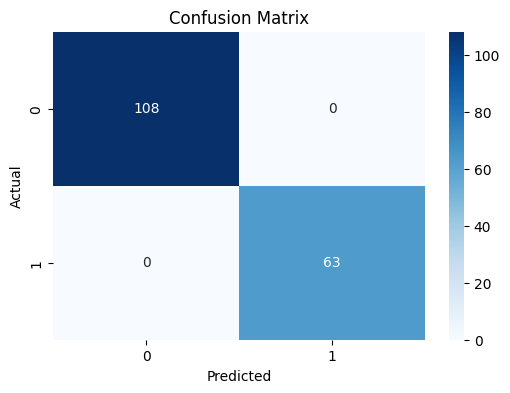

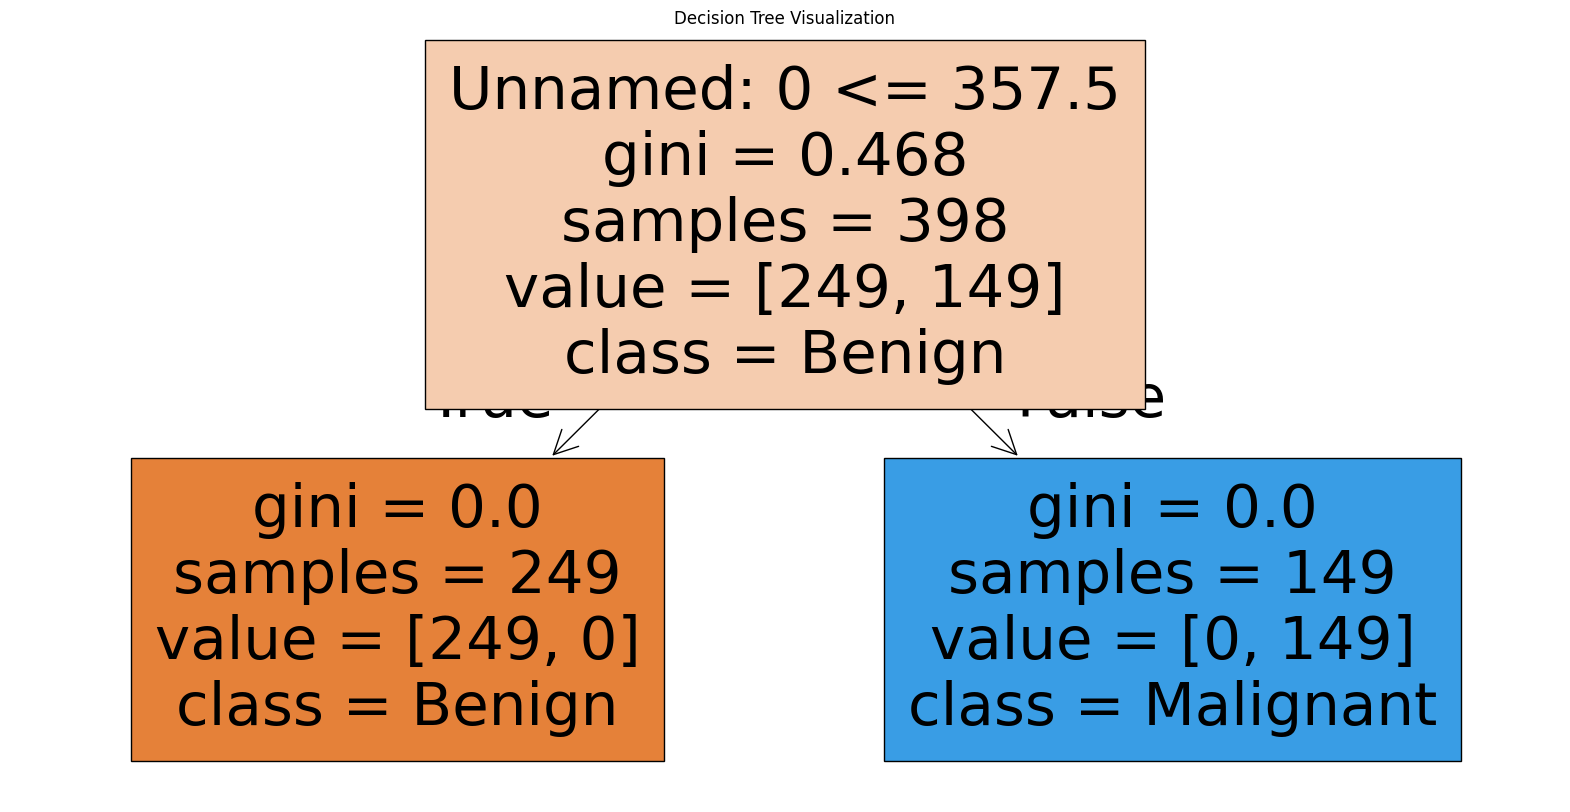

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load CSV
df = pd.read_csv("/kaggle/brca.csv")  # Replace with actual CSV path or upload manually

# Check columns and data
print(df.columns)
print(df.head())

# Define features and target
X = df.drop(columns=['y'])
y = df['y']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [14]:
# ----------- User Input Section -----------
print("\nEnter values for prediction (based on feature order):")
input_features = []

# Loop through feature names
for feature in X.columns:
    value = float(input(f"{feature}: "))
    input_features.append(value)

# Convert to DataFrame
user_input_df = pd.DataFrame([input_features], columns=X.columns)

# Predict user input
user_pred = model.predict(user_input_df)
print("\nPrediction result:")
if user_pred[0] == 'B':
    print(" Predicted: Benign")
else:
    print(" Predicted: Malignant")



Enter values for prediction (based on feature order):
Unnamed: 0: 400
x.radius_mean: 14.5
x.texture_mean: 20.3
x.perimeter_mean: 95.6
x.area_mean: 650.0
x.smoothness_mean: 0.09
x.compactness_mean: 0.13
x.concavity_mean: 0.1
x.concave_pts_mean: 0.05
x.symmetry_mean: 0.2
x.fractal_dim_mean: 0.06
x.radius_se: 0.5
x.texture_se: 1.2
x.perimeter_se: 3.0
x.area_se: 40.0
x.smoothness_se: 0.005
x.compactness_se: 0.02
x.concavity_se: 0.015
x.concave_pts_se: 0.01
x.symmetry_se: 0.02
x.fractal_dim_se: 0.004
x.radius_worst: 16.0
x.texture_worst: 22.0
x.perimeter_worst: 105.0
x.area_worst: 900.0
x.smoothness_worst: 0.15
x.compactness_worst: 0.25
x.concavity_worst: 0.3
x.concave_pts_worst: 0.15
x.symmetry_worst: 0.3
x.fractal_dim_worst: 0.08

Prediction result:
 Predicted: Malignant
